# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Описание данных:** В представленном наборе данных содержится информация по объектам недвижимости в Ленинградской области. Представлены характеристики:

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

**Цель работы:** Определить параметры, влияющие на стоимость объектов недвижимости, с целью автоматизации поиска аномалий в объявлениях.

**Ход исследования**:

1. Изучение общей информации

2. Предобработка данных

3. Добавление дополнительных параметров

4. Исследование зависимостей в данных

5. Общий вывод

### Откройте файл с данными и изучите общую информацию

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

#глобальная настройка для корректного отображения цен на объекты
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#получение данных из файла
df = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")

In [3]:
#обзор первых 10 строк данных
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,NaN,12.000,14.400,5,NaN,...,9.100,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,NaN,26.000,10.600,6,NaN,...,14.400,1.000,посёлок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,NaN,24.000,NaN,22,NaN,...,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,NaN,27.000,15.430,26,NaN,...,8.810,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000
9,18,5400000.000,61.000,2017-02-26T00:00:00,3,2.500,9.000,43.600,7,NaN,...,6.500,2.000,Санкт-Петербург,50898.000,15008.000,0.000,NaN,0.000,NaN,289.000


In [4]:
#обзор данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

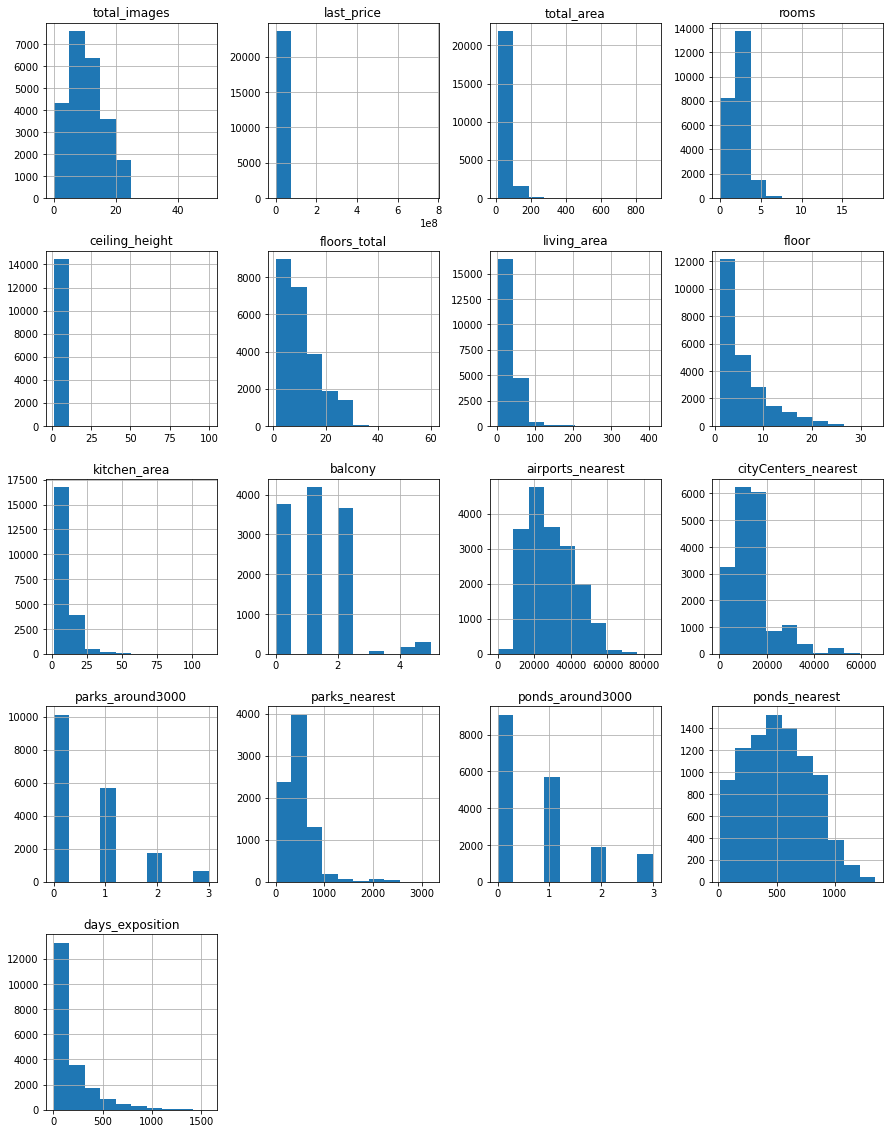

In [5]:
#построение гистограмм столбцов
df.hist(figsize=(15, 20))

**Выводы:**

Стоимость объектов не превышает 100 млн. руб.

Площадь объектов в большинстве случаев не превышает 400 м2.

Встречаются жилые помещения от 1 и не более 10 жилых комнат.

Значение высоты потолков большинства объектов имеет адекватное значение. Необходимо проверить выбросы.

Большинство объектов имеет жилую площадь ниже 400 м2.

Преобладают объекты с небольшим количеством этажей.

Площадь кухни большинства объектов менее 75 м2.

Присутствуют объекты не более чем с 5 балконами.

Объекты расположены на удалении максимум 80 км от аэропорта.

Объекты расположены на удалении максимум 60 км от центра города.

Представлена информация о наличии парков и прудов рядом с объектом недвижимости.

Существуют объекты, которые продаются в течение нескольких дней, а также те, которые не продаются более 1000 дней.

### Выполните предобработку данных

In [6]:
#определение количества пустых строк по столбцам
na = pd.DataFrame()
na['sum'] = df.isna().sum().sort_values(ascending=False)
na['part'] = df.isna().mean().sort_values(ascending=False)*100
display(na)

,sum,part
is_apartment,20924,88.291
parks_nearest,15620,65.910
ponds_nearest,14589,61.560
balcony,11519,48.605
ceiling_height,9195,38.799
airports_nearest,5542,23.385
cityCenters_nearest,5519,23.288
ponds_around3000,5518,23.284
parks_around3000,5518,23.284
days_exposition,3181,13.423


Возможные причины пропусков в данных:


**ceiling_height - 9195** - возможна техническая ошибка (потеря данных), либо человеческая (человек посчитал заполнения этих данных необязательным по какой-то причине). Так как значения этого столбца являются количественными переменными, было принято решение заполнить пропуск медианным значением.


**floors_total - 86** - возможно в доме всего 1 этаж, и по вине человека данное поле было не заполнено, данный столбец связан по смыслу со столбцом "floor" в котором нет пропусков, поэтому было принято решение заполнить пропуски данными из этого столбца.


**living_area - 1903** - причиной потери данных в этом столбце может быть техническая ошибка, жилое помещение не может быть без жилой площади, это является одной из важнейших характеристик при продаже.

**is_apartment - 20924** - причиной потери данных может быть человеческая ошибка, в связи с отсутствием информации об объекте. Так как понятие "апартаменты" появилось сравнительно недавно, было принято решение заполнить пропуски значением False.


**kitchen_area - 2278** - причиной потери данных в этом столбце может быть техническая или человеческая ошибка (данные потеряны, или человек не заполнил информацию).


**balcony - 11519** - причиной потери данных в этом столбце может быть техническая ошибка, поэтому принято решение заполнить пропуски нулевым значением.


**locality_name - 49** - причиной потери данных в этом столбце может быть человеческая ошибка, без обогащения данных, пропуски восполнить не получится.


**airports_nearest - 5542**, **cityCenters_nearest - 5519**, **parks_nearest - 15620**, **ponds_nearest - 14589** - причиной потери данных в этих столбце может быть как техническая, так и человеческая ошибка, без обогащения данных, пропуски восполнить не получится.

**parks_around3000 - 5518**, **ponds_around3000 - 5518** - причиной потери данных в этом столбце может быть техническая ошибка, принято рещение присвоить значение 0.


**days_exposition - 3181** - причиной потери данных в этом столбце может быть техническая ошибка, а также путем не заполнения данного параметра могли указать на то, что квартира до сих пор не продана.

In [7]:
#заполним пустые строки в столбце "ceiling_height" медианным значением
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()

0

In [8]:
#заполним пустые строки в столбце "floors_total" значениями "floor"
df['floors_total'] = df['floors_total'].fillna(df['floor'])
df['floors_total'].isna().sum()

0

In [9]:
#заполним пустые строки в столбце "is_apartment" значением False
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

In [10]:
#заполним пустые строки в столбце "balcony" значением 0
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

In [11]:
#заполним пустые строки в столбце "parks_around3000" значением 0
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'].isna().sum()

0

In [12]:
#заполним пустые строки в столбце "parks_around3000" значением 0
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'].isna().sum()

0

In [13]:
#общая проверка наличия пропусков после проведенных операций
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [14]:
#удаление пропусков в столбце с названиями населенных пунктов
df = df.dropna(subset=['locality_name'])
len(df)

23650

**Изменим тип данных в столбцах следующим образом:**


 **3**   first_day_exposition - object  -> datetime64 -  в столбце хранятся данные о дате
 
 
 **9**   is_apartment         - object  -> bool - в столбце хранятся данные о том, является ли недвижимость апартаментами или нет, возможных значения только 2
 
 
 **13**  balcony              - float64 -> int64 - в столбце хранятся данные количестве балконов, подходит целочисленный тип
 
 
 **17**  parks_around3000     - float64 -> int64 - в столбце хранятся данные количестве парков, подходит целочисленный тип, но есть пропущенные значения, будет ошибка преобразования. Преобразуем в тип Int64
 
 
 **19**  ponds_around3000     - float64 -> int64 - в столбце хранятся данные количестве водоемов, подходит целочисленный тип, но есть пропущенные значения, будет ошибка преобразования. Преобразуем в тип Int64
 
 
 **21**  days_exposition      - float64 -> int64 - в столбце хранятся данные количестве дней, подходит целочисленный тип
 

In [15]:
#преобразование типа данных в столбце 'first_day_exposition'
try:
    df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
except:
    print("Ошибка преобразования типа")

In [16]:
#преобразование типа данных в столбце 'is_apartment'
try:
    df['is_apartment'] = df['is_apartment'].astype('bool')
except:
    print("Ошибка преобразования типа")

In [17]:
#преобразование типа данных в столбце 'balcony'
try:
    df['balcony'] = df['balcony'].astype('int64')
except:
    print("Ошибка преобразования типа")

In [18]:
#преобразование типа данных в столбце 'parks_around3000'
try:
    df['parks_around3000'] = df['parks_around3000'].astype('Int64')
except:
    print("Ошибка преобразования типа")

In [19]:
#преобразование типа данных в столбце 'ponds_around3000'
try:
    df['ponds_around3000'] = df['ponds_around3000'].astype('Int64')
except:
    print("Ошибка преобразования типа")

In [20]:
#преобразование типа данных в столбце 'days_exposition'
try:
    df['days_exposition'] = df['days_exposition'].astype('int64', errors="ignore")
except:
    print("Ошибка преобразования типа")

In [21]:
#общая проверка внесенных изменений
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

**Изучение уникальных значений столбца с названиями населенных пунктов**

In [22]:
#просмотр значений столбца с названием поселений
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [23]:
#удалим букву "ё" и заменим обозначения "поселок ", "городской поселок ", "поселок городского типа " на пустые строки
#df['locality_name'] = (
#    df['locality_name']
#    .str.lower()
#    .str.replace('ё', 'е')
#    .replace(['поселок ', 'городской ', 'городского ', 'типа ', 'село ', 'деревня ', 'садовое товарищество '], '', regex=True)
#)
#определим количество уникальных значений
#len(df['locality_name'].unique())

In [24]:
#функция для выделения подстрок, начинающихся с большой буквы
def upper_only(phrase):
    phrase_list = phrase.split(' ')
    upper = []
    for word in phrase_list:
        if word[0].isupper():
            upper.append(word)
    upper_string = ' '.join(upper)
    return upper_string

In [25]:
#оставим только имена собственные в столбце "locality_name"
df['locality_name'] = df['locality_name'].apply(upper_only)

In [26]:
#рассмотрим получившийся результат
df['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

### Добавьте в таблицу новые столбцы

In [27]:
#добавим столбец с ценой за квадратный метр
df['m2price'] = round(df['last_price'] / df['total_area'], 2)
df['m2price'].head()

0   120370.370
1    82920.790
2    92785.710
3   408176.100
4   100000.000
Name: m2price, dtype: float64

In [28]:
#добавим столбец с днем недели
df['weekday'] = df['first_day_exposition'].dt.weekday
df['weekday'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64

In [29]:
#добавим столбец с месяцем публикации объявления
df['month'] = df['first_day_exposition'].dt.month
df['month'].head()

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

In [30]:
#добавим столбец с годом публикации объявления
df['year'] = df['first_day_exposition'].dt.year
df['year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

In [31]:
#добавим столбец с типом этажа "первый", "последний", "другой"

#функция, которая будет применяться к строке набора данных
def floor_type(row):
    if row['floor'] == 1:
        return "первый"
    elif row['floor'] == row['floors_total']:
        return "последний"
    else:
        return "другой"

#создание столбца с типом этажа
df['floor_type'] = df.apply(floor_type, axis=1)
df['floor_type'].head()

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_type, dtype: object

In [32]:
#добавим столбец с расстоянием от центра города в км
df['km_to_center'] = round(df['cityCenters_nearest'] / 1000)
df['km_to_center'].head()

0   16.000
1   19.000
2   14.000
3    7.000
4    8.000
Name: km_to_center, dtype: float64

### Проведите исследовательский анализ данных

In [33]:
#создадим список исследуемых параметров
explore_columns = ['total_area',
                   'living_area',
                   'kitchen_area',
                   'last_price', 'rooms',
                   'ceiling_height',
                   'floor_type',
                   'floors_total',
                   'cityCenters_nearest',
                   'parks_nearest']

In [34]:
#функция для построения гистограмм параметров из набора данных
def hist_func(data, columns):
    for column in columns:
        ax = data[column].hist(bins=100, figsize=(10, 5))
        ax.set_title('Гистограмма ' + column)
        ax.set_xlabel(column)
        ax.set_ylabel("Количество объявлений")
        plt.show()
        print(data[column].describe())

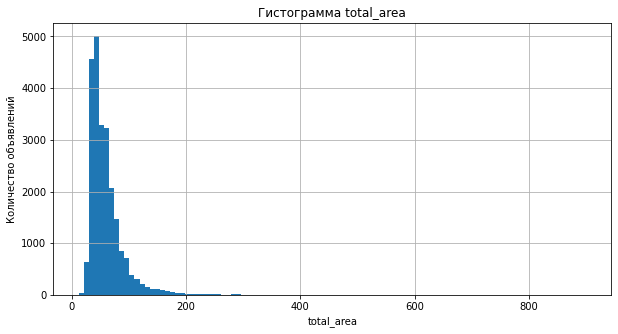

count   23650.000
mean       60.329
std        35.662
min        12.000
25%        40.000
50%        52.000
75%        69.700
max       900.000
Name: total_area, dtype: float64


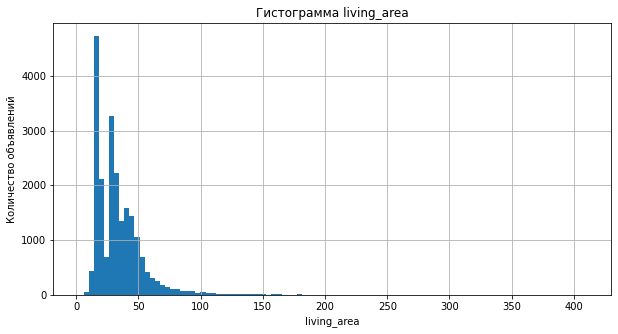

count   21752.000
mean       34.448
std        22.038
min         2.000
25%        18.600
50%        30.000
75%        42.300
max       409.700
Name: living_area, dtype: float64


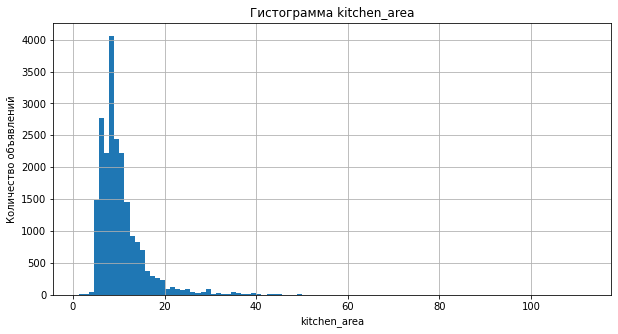

count   21381.000
mean       10.566
std         5.902
min         1.300
25%         7.000
50%         9.100
75%        12.000
max       112.000
Name: kitchen_area, dtype: float64


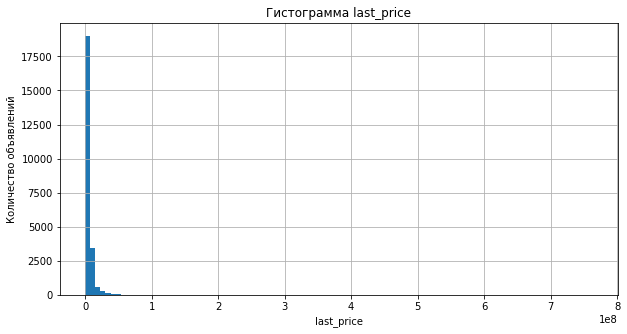

count       23650.000
mean      6541126.898
std      10896399.175
min         12190.000
25%       3400000.000
50%       4650000.000
75%       6799000.000
max     763000000.000
Name: last_price, dtype: float64


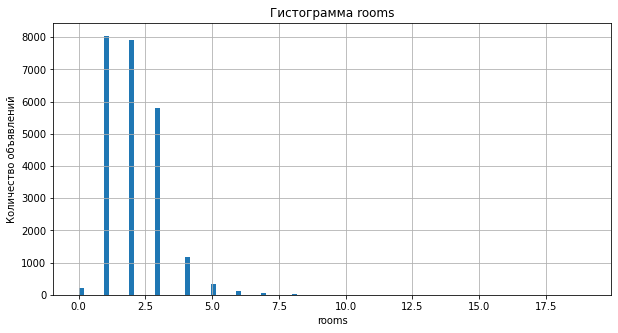

count   23650.000
mean        2.070
std         1.079
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64


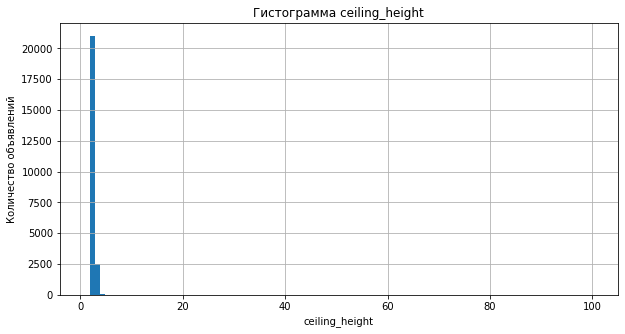

count   23650.000
mean        2.724
std         0.989
min         1.000
25%         2.600
50%         2.650
75%         2.700
max       100.000
Name: ceiling_height, dtype: float64


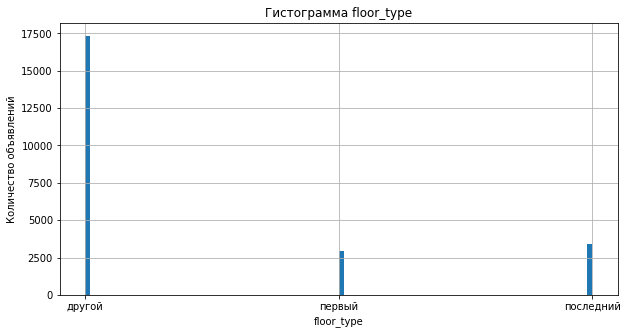

count      23650
unique         3
top       другой
freq       17326
Name: floor_type, dtype: object


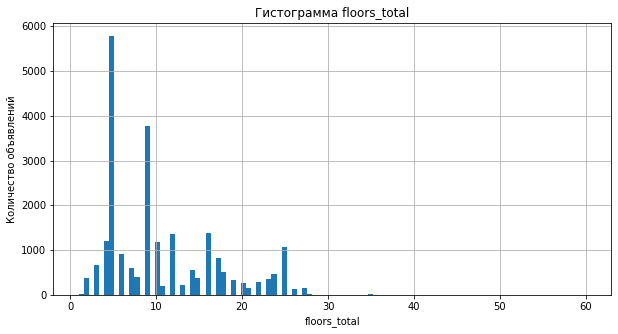

count   23650.000
mean       10.674
std         6.593
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64


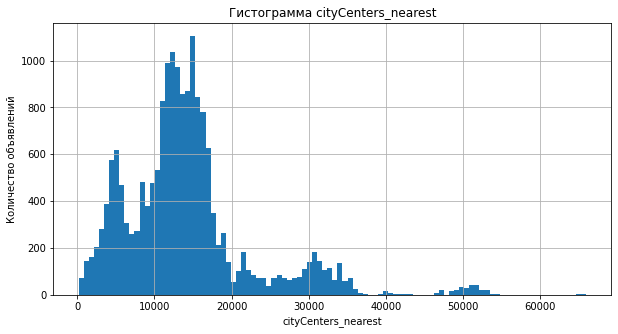

count   18139.000
mean    14197.861
std      8606.830
min       181.000
25%      9241.000
50%     13105.000
75%     16293.000
max     65968.000
Name: cityCenters_nearest, dtype: float64


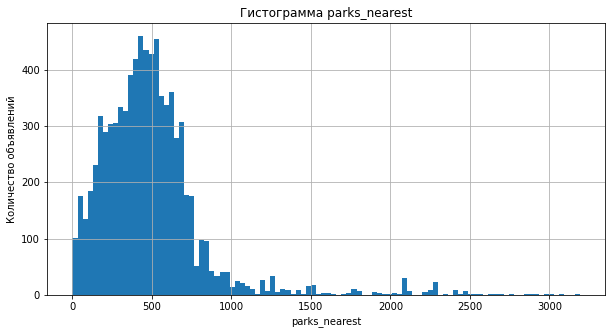

count   8064.000
mean     490.831
std      342.554
min        1.000
25%      288.000
50%      454.500
75%      612.000
max     3190.000
Name: parks_nearest, dtype: float64


In [35]:
#применим функцию для отрисовки гистограмм к набору данных
hist_func(df, explore_columns)

**Выводы по гистограммам:**

1. **'total_area'** - Площадь помещения для жилой недвижимости больше 400 м2 - редкие значения, их небольшое количество (23 записи). Принято решение отбросить эти значения.

2. **'living_area'** - Выбивающиеся значения для этого столбца больше 200 м2 - редкие значения, их небольшое количество (31 записи). Принято решение отбросить эти значения.

3. **'kitchen_area'** - Выбивающиеся значения для этого столбца больше 50 м2 - редкие значения, их небольшое количество (44 записи). Принято решение отбросить эти значения.

4. **'last_price'** - В данном столбце есть выдающиеся значения, например, более 50 млн. руб., однако таких значений достаточное количество. Принято решение не отбрасывать значения.

5. **'rooms'** - 31 объект имеет более 7 комнат, эти объекты можно исключить из рассмотрения

5. **'ceiling_height'** - Высота потолка в столбце "ceiling_height" имеет выделяющиеся значения, например, максимальное 100м. Для корректировки значений, все значения, которые выше 10м, можно разделить на 10.

6. **'floor_type'** - Важная характеристика, по каждому значению несколько тысяч объектов, нельзя отбрасывать значения.

7. **'floors_total'** - Объектов с более чем 30 этажами всего 32, принято решение отбросить выбивающиеся значения.

8. **'cityCenters_nearest'** - Объектов на удалении свыше 55 км от центра города небольшое количество (12). Принято решение отбросить выбивающиеся значения.

9. **'parks_nearest'** - Объектов на удалении свыше 2.5 км от ближайшего парка небольшое количество (16). Принято решение отбросить выбивающиеся значения.

In [36]:
df[df['living_area'] > 200].count()

total_images            31
last_price              31
total_area              31
first_day_exposition    31
rooms                   31
ceiling_height          31
floors_total            31
living_area             31
floor                   31
is_apartment            31
studio                  31
open_plan               31
kitchen_area            29
balcony                 31
locality_name           31
airports_nearest        28
cityCenters_nearest     30
parks_around3000        31
parks_nearest           22
ponds_around3000        31
ponds_nearest           20
days_exposition         27
m2price                 31
weekday                 31
month                   31
year                    31
floor_type              31
km_to_center            30
dtype: int64

In [37]:
#определим какое количество значений, можно отбросить в столбце 'total_area', исходя из принципа,
#что жилая недвижимость редко строится площадью больше 400 м2
huge_realty_count = df[df['total_area'] > 400]['total_area'].count()
print(huge_realty_count)

23


In [38]:
#определим какое количество значений, можно отбросить в столбце 'living_area', исходя из принципа,
#что выдающимися считаются значения больше 200 м2
huge_living_count = df[df['living_area'] > 200]['living_area'].count()
print(huge_living_count)

31


In [39]:
#определим какое количество значений, можно отбросить в столбце 'kitchen_area', исходя из принципа,
#что выдающимися считаются значения больше 200 м2
huge_kitchen_count = df[df['kitchen_area'] > 50]['kitchen_area'].count()
print(huge_kitchen_count)

46


In [40]:
#определим количество выдающихся значений в столбце 'last_price'
huge_price_count = df[df['last_price'] > 50000000]['last_price'].count()
print(huge_price_count)

131


In [41]:
#определим количество выдающихся значений в столбце 'rooms'
rooms_count = df[df['rooms'] > 7]['rooms'].count()
print(rooms_count)

31


In [42]:
#определим количество выдающихся значений в столбце 'floors_total'
many_floors_count = df[df['floors_total'] > 30]['floors_total'].count()
print(many_floors_count)

32


In [43]:
#определим количество выдающихся значений в столбце 'cityCenters_nearest'
too_far_count = df[df['cityCenters_nearest'] > 55000]['cityCenters_nearest'].count()
print(too_far_count)

12


In [44]:
#определим количество выдающихся значений в столбце 'parks_nearest'
park_far_count = df[df['parks_nearest'] > 2500]['parks_nearest'].count()
print(park_far_count)

16


In [45]:
#эти данные можно отбросить 'total_area'
df = df[df['total_area'] < 400]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2price,weekday,month,year,floor_type,km_to_center
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,False,...,482.000,2,755.000,NaN,120370.370,3,3,2019,другой,16.000
1,7,3350000.000,40.400,2018-12-04,1,2.650,11.000,18.600,1,False,...,NaN,0,NaN,81.000,82920.790,1,12,2018,первый,19.000
2,10,5196000.000,56.000,2015-08-20,2,2.650,5.000,34.300,4,False,...,90.000,2,574.000,558.000,92785.710,3,8,2015,другой,14.000
3,0,64900000.000,159.000,2015-07-24,3,2.650,14.000,NaN,9,False,...,84.000,3,234.000,424.000,408176.100,4,7,2015,другой,7.000
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,False,...,112.000,1,48.000,121.000,100000.000,1,6,2018,другой,8.000


In [46]:
#эти данные можно отбросить 'living_area'
df = df[df['living_area'] < 200]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2price,weekday,month,year,floor_type,km_to_center
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,False,...,482.000,2,755.000,NaN,120370.370,3,3,2019,другой,16.000
1,7,3350000.000,40.400,2018-12-04,1,2.650,11.000,18.600,1,False,...,NaN,0,NaN,81.000,82920.790,1,12,2018,первый,19.000
2,10,5196000.000,56.000,2015-08-20,2,2.650,5.000,34.300,4,False,...,90.000,2,574.000,558.000,92785.710,3,8,2015,другой,14.000
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,False,...,112.000,1,48.000,121.000,100000.000,1,6,2018,другой,8.000
5,10,2890000.000,30.400,2018-09-10,1,2.650,12.000,14.400,5,False,...,NaN,0,NaN,55.000,95065.790,0,9,2018,другой,NaN


In [47]:
#эти данные можно отбросить 'kitchen_area'
df = df[df['kitchen_area'] < 50]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2price,weekday,month,year,floor_type,km_to_center
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,False,...,482.000,2,755.000,NaN,120370.370,3,3,2019,другой,16.000
1,7,3350000.000,40.400,2018-12-04,1,2.650,11.000,18.600,1,False,...,NaN,0,NaN,81.000,82920.790,1,12,2018,первый,19.000
2,10,5196000.000,56.000,2015-08-20,2,2.650,5.000,34.300,4,False,...,90.000,2,574.000,558.000,92785.710,3,8,2015,другой,14.000
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,False,...,112.000,1,48.000,121.000,100000.000,1,6,2018,другой,8.000
5,10,2890000.000,30.400,2018-09-10,1,2.650,12.000,14.400,5,False,...,NaN,0,NaN,55.000,95065.790,0,9,2018,другой,NaN


In [48]:
#эти данные можно отбросить 'rooms'
df = df[df['rooms'] < 7]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2price,weekday,month,year,floor_type,km_to_center
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,False,...,482.000,2,755.000,NaN,120370.370,3,3,2019,другой,16.000
1,7,3350000.000,40.400,2018-12-04,1,2.650,11.000,18.600,1,False,...,NaN,0,NaN,81.000,82920.790,1,12,2018,первый,19.000
2,10,5196000.000,56.000,2015-08-20,2,2.650,5.000,34.300,4,False,...,90.000,2,574.000,558.000,92785.710,3,8,2015,другой,14.000
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,False,...,112.000,1,48.000,121.000,100000.000,1,6,2018,другой,8.000
5,10,2890000.000,30.400,2018-09-10,1,2.650,12.000,14.400,5,False,...,NaN,0,NaN,55.000,95065.790,0,9,2018,другой,NaN


In [49]:
#эти данные можно отбросить 'floors_total'
df = df[df['floors_total'] < 30]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2price,weekday,month,year,floor_type,km_to_center
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,False,...,482.000,2,755.000,NaN,120370.370,3,3,2019,другой,16.000
1,7,3350000.000,40.400,2018-12-04,1,2.650,11.000,18.600,1,False,...,NaN,0,NaN,81.000,82920.790,1,12,2018,первый,19.000
2,10,5196000.000,56.000,2015-08-20,2,2.650,5.000,34.300,4,False,...,90.000,2,574.000,558.000,92785.710,3,8,2015,другой,14.000
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,False,...,112.000,1,48.000,121.000,100000.000,1,6,2018,другой,8.000
5,10,2890000.000,30.400,2018-09-10,1,2.650,12.000,14.400,5,False,...,NaN,0,NaN,55.000,95065.790,0,9,2018,другой,NaN


In [50]:
#эти данные можно отбросить 'cityCenters_nearest'
df = df[df['cityCenters_nearest'] < 55000]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2price,weekday,month,year,floor_type,km_to_center
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,False,...,482.000,2,755.000,NaN,120370.370,3,3,2019,другой,16.000
1,7,3350000.000,40.400,2018-12-04,1,2.650,11.000,18.600,1,False,...,NaN,0,NaN,81.000,82920.790,1,12,2018,первый,19.000
2,10,5196000.000,56.000,2015-08-20,2,2.650,5.000,34.300,4,False,...,90.000,2,574.000,558.000,92785.710,3,8,2015,другой,14.000
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,False,...,112.000,1,48.000,121.000,100000.000,1,6,2018,другой,8.000
6,6,3700000.000,37.300,2017-11-02,1,2.650,26.000,10.600,6,False,...,NaN,0,NaN,155.000,99195.710,3,11,2017,другой,19.000


In [51]:
#эти данные можно отбросить 'parks_nearest'
df = df[df['parks_nearest'] < 2500]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2price,weekday,month,year,floor_type,km_to_center
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,False,...,482.000,2,755.000,NaN,120370.370,3,3,2019,другой,16.000
2,10,5196000.000,56.000,2015-08-20,2,2.650,5.000,34.300,4,False,...,90.000,2,574.000,558.000,92785.710,3,8,2015,другой,14.000
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,False,...,112.000,1,48.000,121.000,100000.000,1,6,2018,другой,8.000
10,5,5050000.000,39.600,2017-11-16,1,2.670,12.000,20.300,3,False,...,310.000,2,553.000,137.000,127525.250,3,11,2017,другой,14.000
13,20,3550000.000,42.800,2017-07-01,2,2.560,5.000,27.000,5,False,...,294.000,3,298.000,366.000,82943.930,5,7,2017,последний,33.000


In [52]:
#функция для корректировки значений высоты потолка
def ceil_func(height):
    if height >= 10.0:
        return height / 10
    else:
        return height

#скорректируем выдающиеся значения в столбце 'ceiling_heihgt'
df['ceiling_height'] = df['ceiling_height'].apply(ceil_func)

count   7131.000
mean       2.755
std        0.300
min        1.000
25%        2.600
50%        2.650
75%        2.800
max       10.000
Name: ceiling_height, dtype: float64

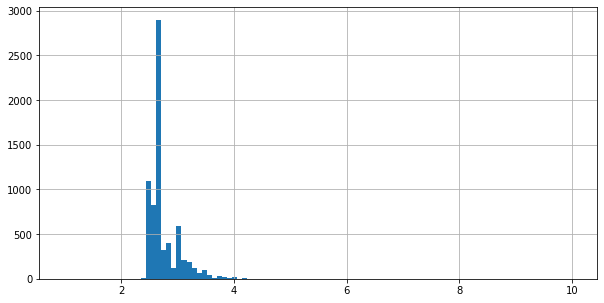

In [53]:
#проверка откоррекстированых значений столбца
df['ceiling_height'].hist(bins=100, figsize=(10, 5))
df['ceiling_height'].describe()

Определим, как быстро продавались объекты недвижимости с помощью столбца 'days_exposition':

<AxesSubplot:>

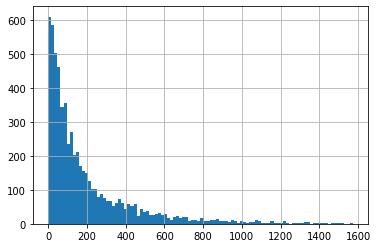

In [54]:
df['days_exposition'].hist(bins=100)

In [55]:
print('Среднее значение числа дней продажи:', df['days_exposition'].mean())
print('Медианное значение числа дней продажи:', df['days_exposition'].median())

Среднее значение числа дней продажи: 196.07010949501552
Медианное значение числа дней продажи: 108.0


<AxesSubplot:>

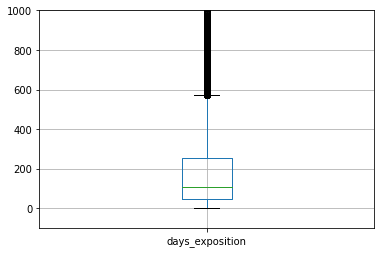

In [56]:
#построим диаграмму размаха
days_data = pd.DataFrame()
days_data['days_exposition'] = df['days_exposition']
plt.ylim(-100, 1000)
days_data.boxplot()

In [57]:
#получим описание датафрейма с днями от размещения до продажи
days_data.describe()

,days_exposition
count,6119.000
mean,196.070
std,233.973
min,1.000
25%,45.000
50%,108.000
75%,255.000
max,1572.000


**Медианное значение** числа дней от размещения объявления до продажи - 108

**Нормальными** можно считать значения в пределах 1.5 межквартильного размаха, т.е. от 1 до 574

**Быстрыми** можно считать продажи, которые длятся менее 45 дней

**Чрезвычайно медленные** продажи длятся более 574 дней

In [58]:
print('Количество чрезвычайно медленных продаж объектов:', df[df['days_exposition'] > 574]['days_exposition'].count())

Количество чрезвычайно медленных продаж объектов: 466


**Определим, какие параметры влияют на стоимость объекта:**

In [59]:
#список рассматриваемых параметров набора данных
price_impact = ['total_area',
               'living_area',
               'kitchen_area',
               'rooms',
               'floor_type',
               'weekday',
               'month',
               'year']

In [60]:
#функция для отрисовки диаграмм корреляции
def corr_func(param):
    df.plot(x=param, y='last_price', kind='scatter')
    plt.show()
    print('Коэффициент корреляции цены от', param, ":", df[param].corr(df["last_price"]))

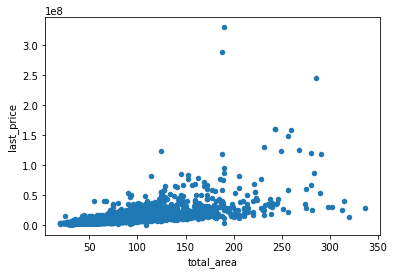

Коэффициент корреляции цены от total_area : 0.648331100412092


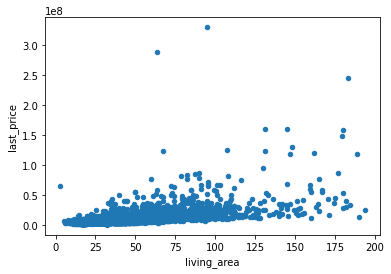

Коэффициент корреляции цены от living_area : 0.5761409412096055


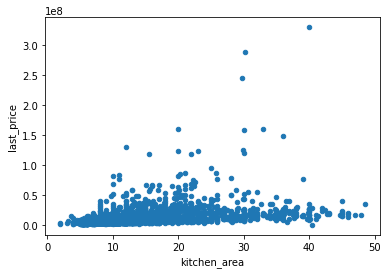

Коэффициент корреляции цены от kitchen_area : 0.45872529378248406


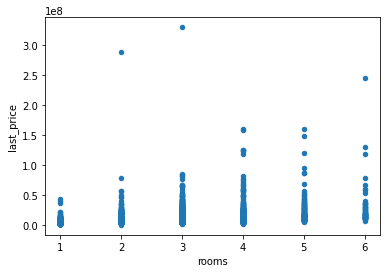

Коэффициент корреляции цены от rooms : 0.3841478855673642


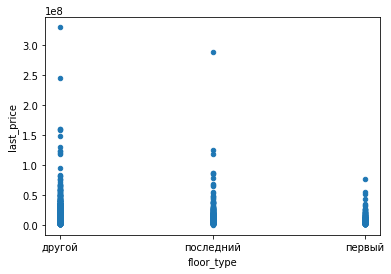

Не сработало с параметром floor_type


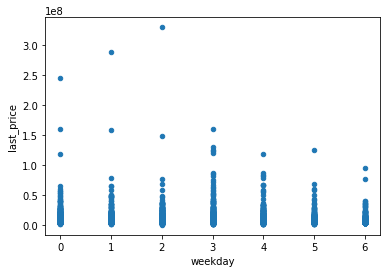

Коэффициент корреляции цены от weekday : -0.012199748093868826


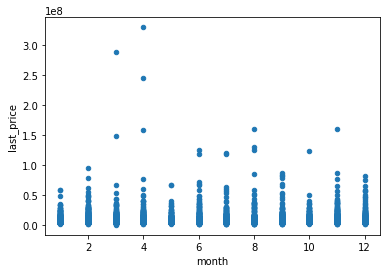

Коэффициент корреляции цены от month : 0.005531731177970437


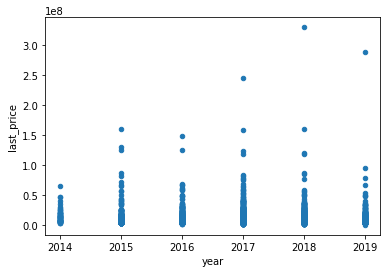

Коэффициент корреляции цены от year : -0.058900004310714654


In [61]:
#применим функцию к параметрам
for param in price_impact:
    try:
        corr_func(param)
    except:
        print('Не сработало с параметром', param)

**Сильнее всего цена на объект недвижимости зависит от параметров:**

1. Общая площадь

2. Жилая площадь

3. Площадь кухни

4. Количество комнат

**Определим цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений**

In [62]:
biggest_localities = (df.pivot_table(index='locality_name', 
                                    values='m2price', 
                                    aggfunc='mean')
                                    .sort_values(by='m2price', 
                                    ascending=False)
                                    [0:10]
                     )
display(biggest_localities)

,m2price
locality_name,
Санкт-Петербург,119809.697
Сестрорецк,107330.777
Пушкин,104999.384
Зеленогорск,104801.397
Павловск,91291.021
Стрельна,88299.522
Петергоф,84735.686
Парголово,81360.781
Кронштадт,79920.284


In [63]:
print('Самая высокая цена за м2:', biggest_localities[0:1])

print('Самая низкая цена за м2:', biggest_localities[-1:])

Самая высокая цена за м2:                    m2price
locality_name             
Санкт-Петербург 119809.697
Самая низкая цена за м2:                 m2price
locality_name          
Колпино       75572.331


Самая высокая цена квадратного метра оказалась в Санкт-Петербурге 119809.697.

Самая низкая в Колпино 75572,331.

**Определим, как стоимость объекта зависит от расстояния до центра**

Санкт-Петербург
               last_price
km_to_center             
0.000        28364081.400
1.000        21340776.555
2.000        16331066.726
3.000        10529644.071
4.000        11909699.446
5.000        11316650.905
6.000        14791182.226
7.000        15779978.551
8.000         9760611.990
9.000         7506000.706
10.000        6992681.258
11.000        6635089.651
12.000        6169635.133
13.000        6467367.547
14.000        5301402.164
15.000        5330449.132
16.000        5509701.683
17.000        5890082.421
18.000        4622500.000
19.000        4555365.000
20.000        5916666.667
21.000        3819285.714
22.000        4050000.000
25.000        4628333.333
26.000        4122000.000
27.000       14350000.000
28.000        6950000.000


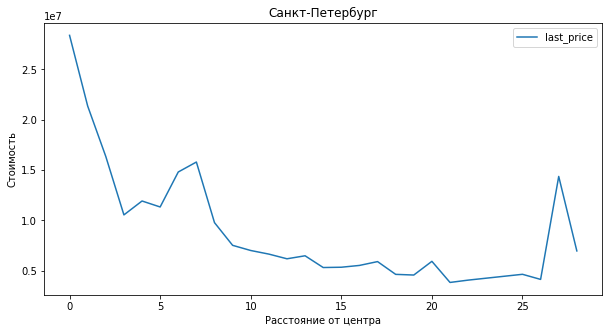

In [64]:
#проведем фильтрацию объектов, чтобы в итоговый результат не попало пустых строк
df = df.dropna(subset=['locality_name','last_price', 'km_to_center'], axis=0)

#для Санкт-Петербурга определим в цикле стоимость объектов на разном удалении от центра

locality_data = df[df['locality_name'] == "Санкт-Петербург"]
#вывод текстовой информации
print("Санкт-Петербург")
print(locality_data.pivot_table(
    index='km_to_center',
    values='last_price',
    aggfunc='mean')
    .sort_values(by='km_to_center', ascending=True)
     )
#вывод графика
(
locality_data.pivot_table(
    index='km_to_center',
    values='last_price',
    aggfunc='mean')
    .sort_values(by='km_to_center', ascending=True)
    .plot(kind='line', title="Санкт-Петербург", xlabel='Расстояние от центра', ylabel='Стоимость', figsize=(10, 5))
)
plt.show()

**Для объектов в Санкт-Петербурге прослеживается зависимость стоимости объекта недвижимости от значения расстояния до центра города. Чем ближе к центру города, тем выше стоимость объекта.**

### Напишите общий вывод

**1. Предобработка данных:**

В ходе предобработки данных были устранены пропуски в данных. Часть из них может быть связана с техническими ошибками (balcony), можно заполнить эти данные значением 0. Другая часть данных вероятнее всего отсутствует в результате ошибки человека (floors_total, is_apartment), эти данные были заполнены по смыслу содержащихся в них характеристик. Пропуски количественной переменной ceiling_height были заполнены медианным значением. Выполнена обработка выделяющихся значений "выбросов" в столбце "ceiling_height", все высоты потолков более 10 метров были приведены к правильным значениям. По столбцам "total_area", "living_area", "kitchen_area", "rooms", "floors_total", "cityCenters_nearest", "parks_nearest" были отброшены выбивающиеся и одновременно редкие значения. Произведено преобразование типов данных для работы с датой, количественными характеристиками.

**2. Выявленные зависимости:**

Для изучения данных добавлены столбцы с ценой за квадратный метр, днем недели, месяцем, годом продажи, типом этажа и расстоянием в километрах до центра.

2.1. Медианное значение числа дней от размещения объявления до продажи - 108. Нормальными можно считать значения от 1 до 574. Самые быстрые продажи происходят менее чем за 45 дней. Чрезвычайно медленные продажи длятся более 574 дней.

2.2. Сильнее всего на цену на объект недвижимости влияют: общая площадь, жилая площадь, площадь кухни, количество комнат.

2.3. Самая высокая цена квадратного метра оказалась в Санкт-Петербурге 119809.697. Самая низкая в Колпино 75572,331.

2.4 Для объектов в Санкт-Петербурге определена зависимость: чем ближе к центру города, тем выше стоимость объекта.


**3. Какие параметры влияют на стоимость объекта:**

В соответствии с целью исследования, можно сделать вывод, что на стоимость объекта сильнее всего влияют такие параметры как:

1. расстояние до центра города

2. площадь объекта

3. количество комнат

**4. Рекомендации заказчику:**

Для автоматизации оценки стоимости объекта, отслеживания аномалий и мошеннической деятельности стоит руководствоваться приведенными выше параметрами. Для оценки адекватности стоимости также можно пользоваться информацией о стоимости квадратного метра в каждом населенном пункте с учетом расстояния от центра.
